<Axes: >

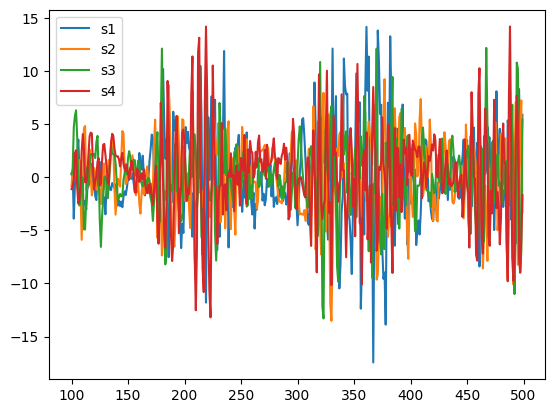

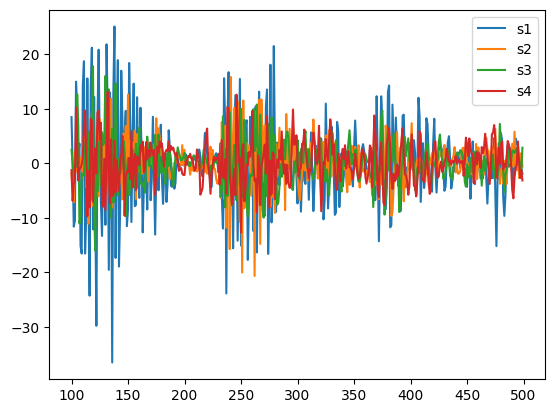

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as ps
import plotly.graph_objects as go
import scipy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import statsmodels.api as sm

#данные
df1 = pd.read_csv('b30hz20.txt', sep = "\t", header = None)
df2 = pd.read_csv('h30hz20.txt', sep = "\t", header = None)

df1.rename(columns = {0: "s1", 1: "s2", 2: "s3", 3: "s4"}, inplace = True)
df1.drop(columns = [4], inplace = True)

df2.rename(columns = {0: "s1", 1: "s2", 2: "s3", 3: "s4"}, inplace = True)
df2.drop(columns = [4], inplace = True)

df1 = df1[100:500]
df2 = df2[100:500]
df1.plot()
df2.plot()


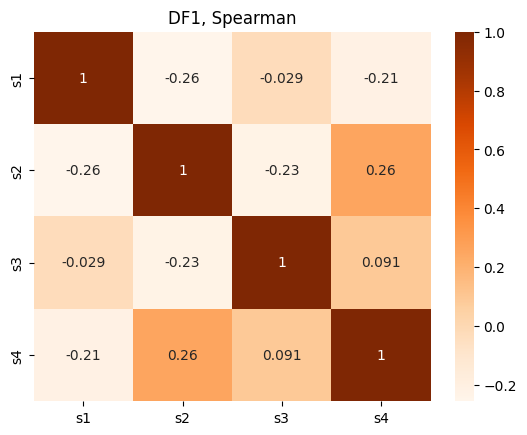

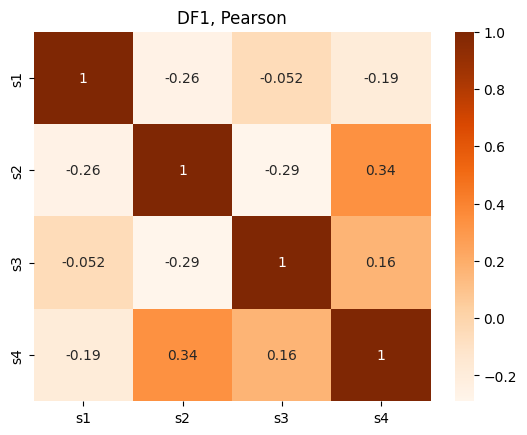

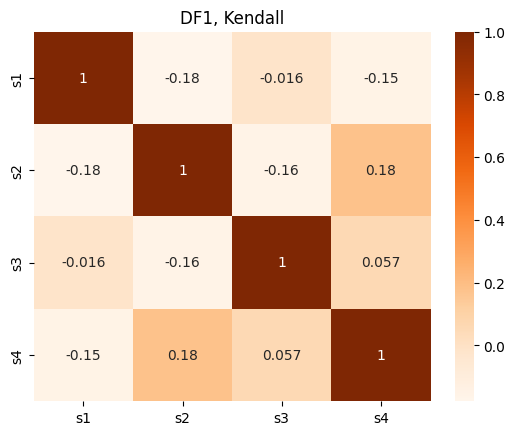

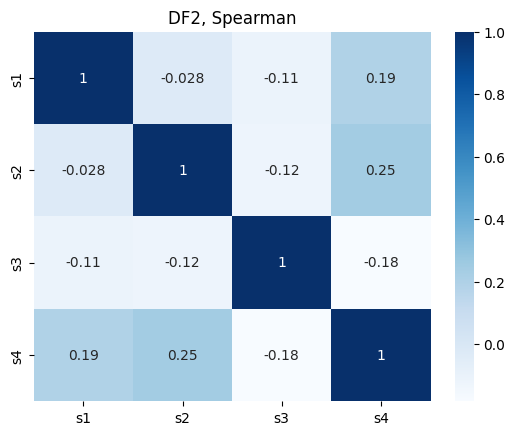

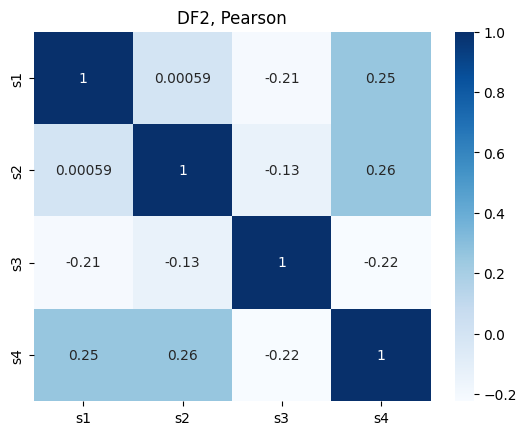

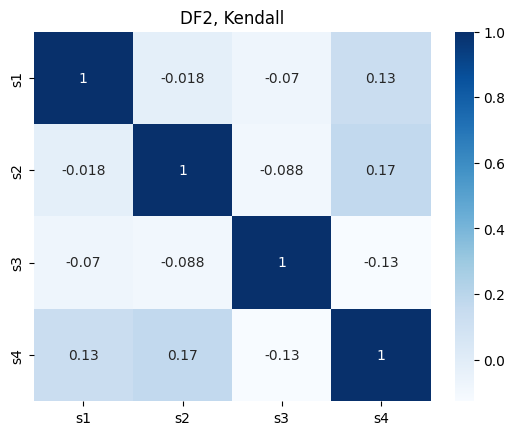

In [133]:
#корреляция сигналов для ДF 1

# Корреляция Спирмена
spearman = df1.corr(method="spearman")
sns.heatmap(spearman, annot=True, cmap='Oranges')
plt.title("DF1, Spearman")
plt.show()

# Корреляция Пирсона
pearson = df1.corr(method="pearson")
sns.heatmap(pearson, annot=True, cmap='Oranges')
plt.title("DF1, Pearson")
plt.show()

# Корреляция Кендалла
kendall = df1.corr(method="kendall")
sns.heatmap(kendall, annot=True, cmap='Oranges')
plt.title("DF1, Kendall")
plt.show()

#корреляция сигналов для ДF 2

spearman = df2.corr(method="spearman")
sns.heatmap(spearman, annot=True, cmap='Blues')
plt.title("DF2, Spearman")
plt.show()

pearson = df2.corr(method="pearson")
sns.heatmap(pearson, annot=True, cmap='Blues')
plt.title("DF2, Pearson")
plt.show()

kendall = df2.corr(method="kendall")
sns.heatmap(kendall, annot=True, cmap='Blues')
plt.title("DF2, Kendall")
plt.show()

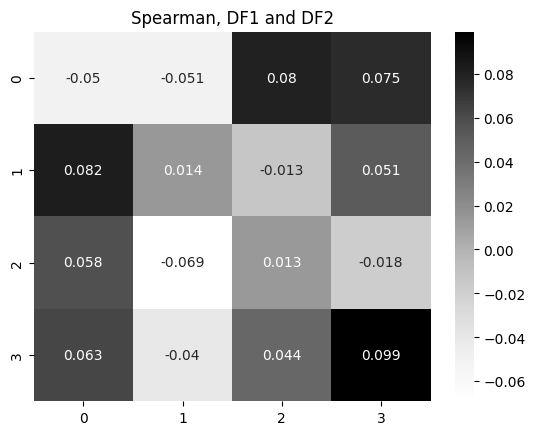

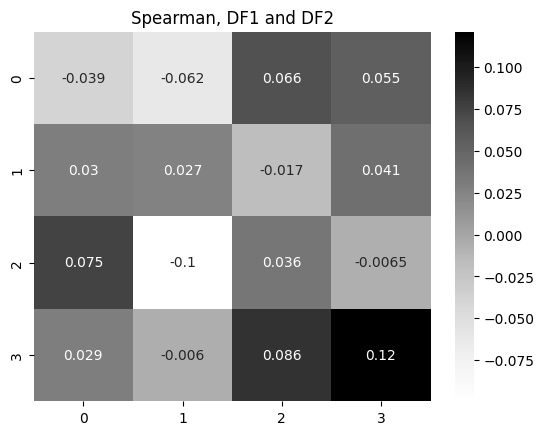

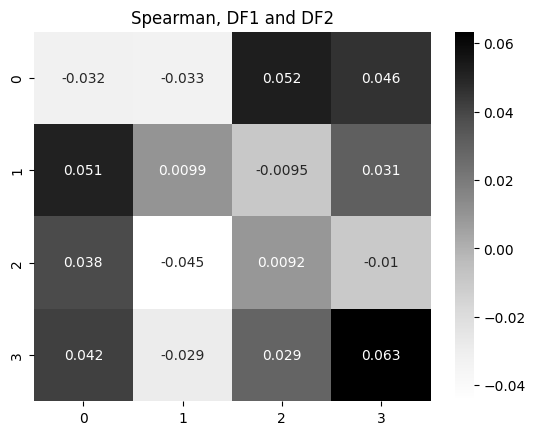

In [134]:
from scipy import stats
spearman = np.zeros((4, 4))
pearson = np.zeros((4, 4))
kendall = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        query = df2.iloc[:, i].to_numpy()
        template = df1.iloc[:, j].to_numpy()
        spearman[i, j] = stats.spearmanr(query, template).correlation # Корреляция Спирмена
        pearson[i, j] = np.corrcoef(query, template)[0, 1]  # Корреляция Пирсона
        kendall[i, j] = stats.kendalltau(query, template).statistic  # Корреляция Кендалла

#визуализируем и использованием тепловой карты
sns.heatmap(spearman, annot = True, cmap = "Greys")
plt.title('Spearman, DF1 and DF2')
plt.show()

sns.heatmap(pearson, annot = True, cmap = "Greys")
plt.title('Spearman, DF1 and DF2')
plt.show()

sns.heatmap(kendall, annot = True, cmap = "Greys")
plt.title('Spearman, DF1 and DF2')
plt.show()

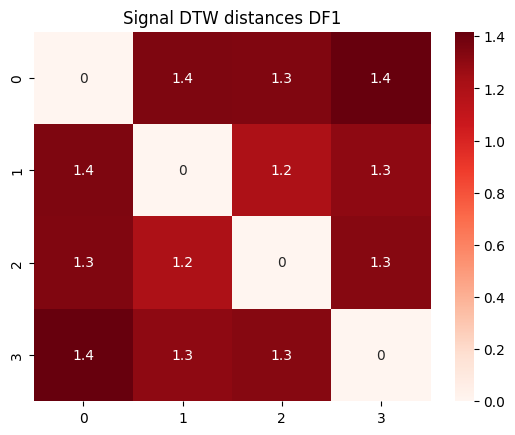

In [135]:
# Dynamic Time Warping (DTW)

#для DF1
from dtw import dtw
dtw_result = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        query = df1.iloc[:, i].to_numpy()
        template = df1.iloc[:, j].to_numpy()
        dtw_distance = dtw(query, template, keep_internals=True)
        dtw_result[i, j] = dtw_distance.normalizedDistance
sns.heatmap(dtw_result, annot=True, cmap="Reds")
plt.title("Signal DTW distances DF1")
plt.show()

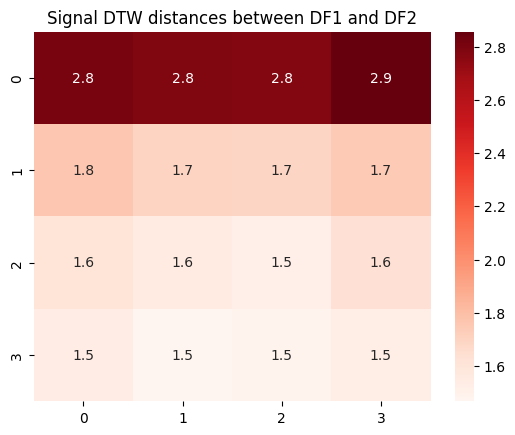

In [136]:
#для сигналов между DF1 и DF2
from dtw import dtw
dtw_result = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        query = df2.iloc[:, i].to_numpy()
        template = df1.iloc[:, j].to_numpy()
        dtw_distance = dtw(query, template, keep_internals=True)
        dtw_result[i, j] = dtw_distance.normalizedDistance
sns.heatmap(dtw_result, annot=True, cmap="Reds")
plt.title("Signal DTW distances between DF1 and DF2")
plt.show()

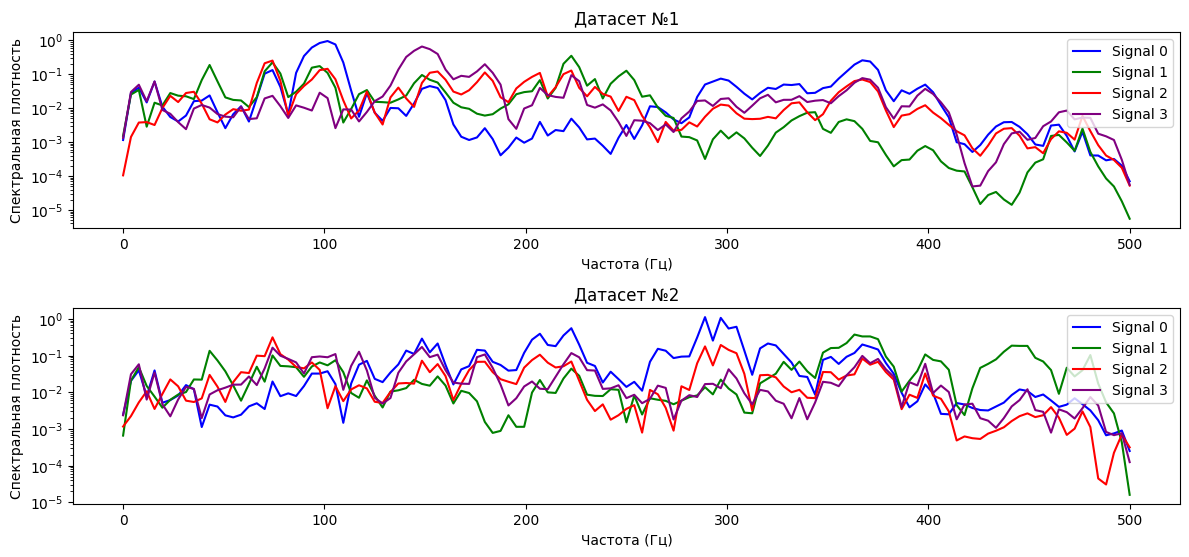

In [137]:
#Спектральная плотность сигнала
#fs = 1000  # Частота дискретизации (замените на актуальное значение)
#nperseg = 256  # Длина сегмента
#noverlap = 128  # Перекрытие сегментов

from scipy.signal import welch

colors = ['blue','green','red', 'purple']
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
for i in range(4):  # перебор в df1
    f, Pxx_den = welch(df1.iloc[:, i].values, fs=1000, nperseg=256, noverlap=128)
    plt.semilogy(f, Pxx_den, label=f'Signal {i}', color = colors[i])
plt.title('Датасет №1')
plt.xlabel('Частота (Гц)')
plt.ylabel('Спектральная плотность')
plt.legend()

# Вычисление спектральной плотности для data2
plt.subplot(3, 1, 2)
for i in range(4):  # Перебор всех сигналов в data2
    f, Pxx_den = welch(df2.iloc[:, i].values, fs=1000, nperseg=256, noverlap=128)
    plt.semilogy(f, Pxx_den, label=f'Signal {i}', color = colors[i])
plt.title('Датасет №2')
plt.xlabel('Частота (Гц)')
plt.ylabel('Спектральная плотность')
plt.legend()

plt.tight_layout()
plt.show()

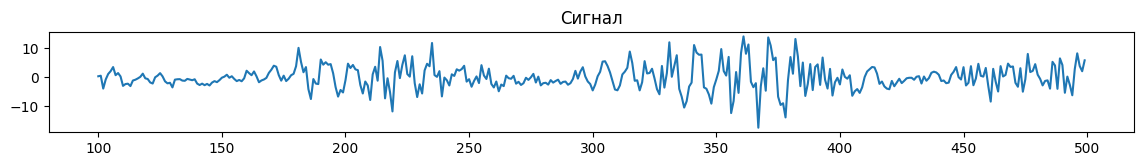

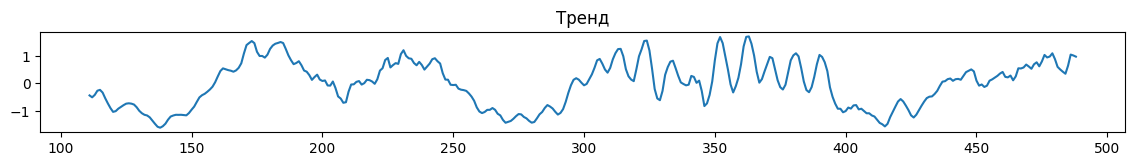

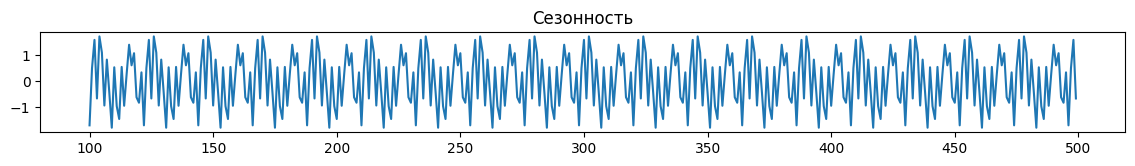

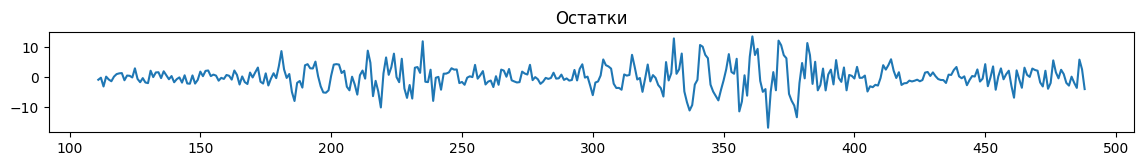

In [140]:
#декомпозиция сигнала

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = []
decompose = df1.iloc[:, 0] #всё из 0
res = seasonal_decompose(decompose, model='additive', period=22)

plt.figure(figsize=(14, 6))
plt.subplot(4, 1, 1)
plt.plot(decompose)
plt.title('Cигнал')
plt.show()

plt.figure(figsize=(14, 6))
plt.subplot(4, 1, 1)
plt.plot(res.trend)
plt.title('Тренд')
plt.show()

plt.figure(figsize=(14, 6))
plt.subplot(4, 1, 1)
plt.plot(res.seasonal)
plt.title('Сезонность')
plt.show()

plt.figure(figsize=(14, 6))
plt.subplot(4, 1, 1)
plt.plot(res.resid)
plt.title('Остатки')

plt.show()